In [42]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [143]:
movies = pd.read_csv('movies.csv')
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [144]:
movies.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [145]:
# dropping missing values that are less than 5 % of the data 
columns_to_drop = movies.columns[movies.isnull().sum() <= len(movies) * 0.05]

In [146]:
movies.dropna(subset = columns_to_drop, inplace = True)

In [147]:
movies.isnull().sum()

name           0
rating         0
genre          0
year           0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
dtype: int64

In [148]:
# extracting only numbers 
pattern = r'(\d+)'
movies['correct_year']= movies['released'].str.extractall(pattern).groupby(level = 0)[0]\
                                                                  .apply(lambda x: ', '.join(x))

In [149]:
movies['correct_year'] = movies['correct_year'].str.split(' ', expand = True)[1]

In [150]:
movies.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,correct_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


In [151]:
# dropping the original year column because we found it was not accurate
movies.drop(columns = 'year', axis = 1 , inplace = True)

In [152]:
# setting the new correct year as the original one 
movies.rename(columns = {'correct_year':'year'}, inplace = True)

In [153]:
# creating a month column
movies['month'] = movies['released'].str.split(' ', expand = True)[0]

In [154]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980,June
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980,July
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980,July


In [155]:
movies['month'].unique()

array(['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'January', 'November',
       '1982', '1985', '1987', '1995', '2019', '2013'], dtype=object)

In [156]:
movies[movies['month'] == '1985']

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
786,Taipei Story,Not Rated,Drama,1985 (Taiwan),7.7,2500.0,Edward Yang,T'ien-wen Chu,Chin Tsai,Taiwan,NaN,35336.0,Evergreen Film Company,119.0,None,1985
800,O.C. and Stiggs,R,Comedy,1985 (United States),5.4,1200.0,Robert Altman,Tod Carroll,Daniel Jenkins,United States,7000000.0,29815.0,Metro-Goldwyn-Mayer (MGM),109.0,None,1985


In [157]:
# we notice that no month is provided fro these rows so we will drop them when analyzing the monthly trends 

In [158]:
movies.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
year         object
month        object
dtype: object

### How has the average movie rating changed over the years?

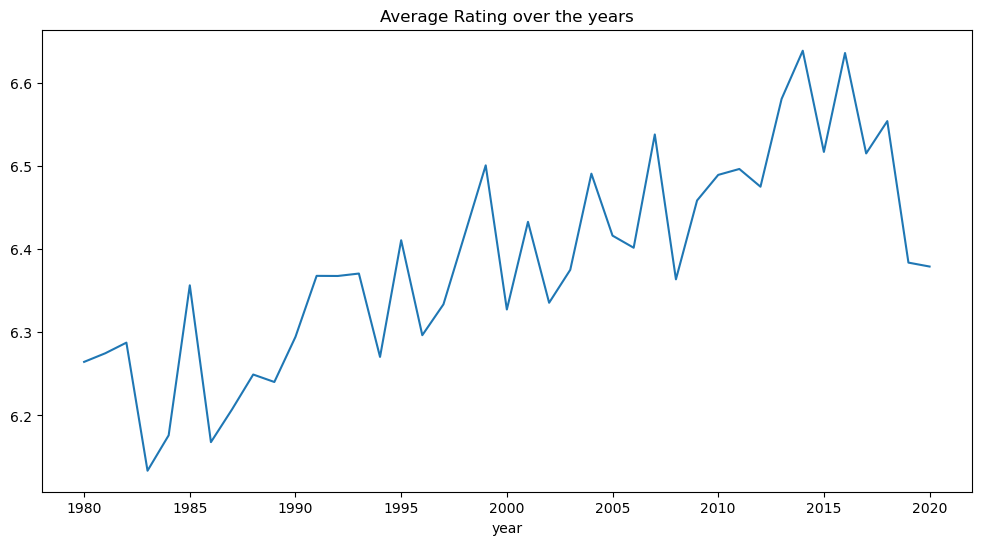

In [646]:
plt.figure(figsize = (12,6))
avg_rating = movies.groupby('year')['score'].mean().plot(kind = 'line')
plt.title('Average Rating over the years')
plt.xlabel('year')
plt.show()

##### Is there a correlation between movie release year and gross revenue?

In [ ]:
## there was missing values in the year column so i just filled it with Zeros to make the column int
## then replaced the zeros with missing values again not to lose any more of the data 

In [161]:
movies['year'].unique()

array(['1980', '1981', '1984', '1983', '1982', None, '1987', '1985',
       '1986', '1988', '1990', '1989', '1992', '2008', '1991', '1993',
       '1999', '2016', '1997', '1994', '2019', '1996', '1995', '2001',
       '2000', '2014', '1998', '2002', '2003', '2005', '2004', '2006',
       '2007', '2010', '2011', '2009', '2013', '2015', '2012', '2017',
       '2018', '2020'], dtype=object)

In [162]:
movies.isnull().sum()

name           0
rating         0
genre          0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
year          47
month          0
dtype: int64

In [176]:
movies['year'] = movies['year'].fillna(0).astype(int)

In [177]:
movies.loc[ movies['year'] == 0, 'year'] = pd.NA 

In [165]:
movies.isnull().sum()

name           0
rating         0
genre          0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
year          47
month          0
dtype: int64

In [178]:
movies.dtypes

name         object
rating       object
genre        object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
year        float64
month        object
dtype: object

In [168]:
movies[['year','gross']].corr()

,year,gross
year,1.000000,0.250423
gross,0.250423,1.000000


<Axes: >

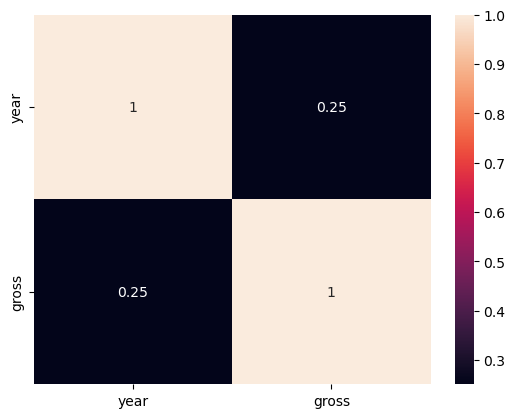

In [169]:
# there is a weak correlation between the year and gross revenue 
sns.heatmap(movies[['year','gross']].corr(), annot = True)

###### we find that there is a weak positive correlation between the year of release and the gross rev

##### Are certain genres becoming more popular over time?

In [170]:
movies['genre'].unique()

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Animation', 'Romance', 'Music',
       'Western', 'Thriller', 'Sci-Fi', 'Mystery', 'Sport', 'Musical'],
      dtype=object)

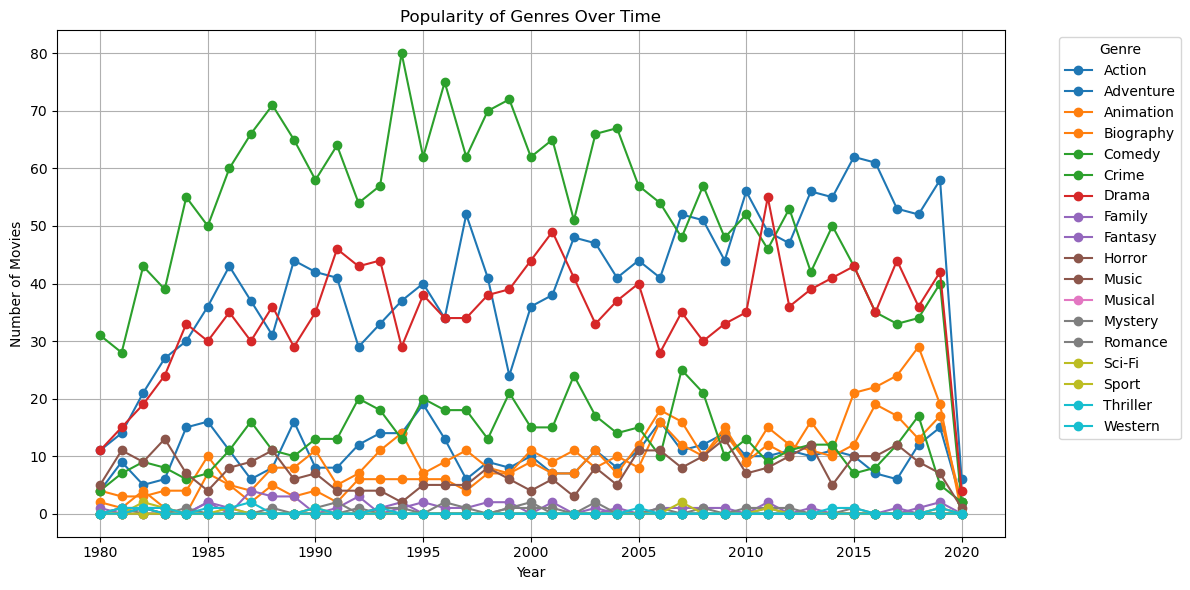

In [203]:
genre_counts = movies.groupby(['year', 'genre']).size().unstack(fill_value=0)
# Plotting
plt.figure(figsize=(12, 6))
genre_counts.plot(kind='line', marker='o', cmap='tab10', ax=plt.gca())  # Adjust marker and colormap as needed
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [221]:
top_genres = genre_counts.sum().sort_values(ascending = False)[:8].index.to_list()
top_genres

['Comedy',
 'Action',
 'Drama',
 'Crime',
 'Biography',
 'Adventure',
 'Animation',
 'Horror']

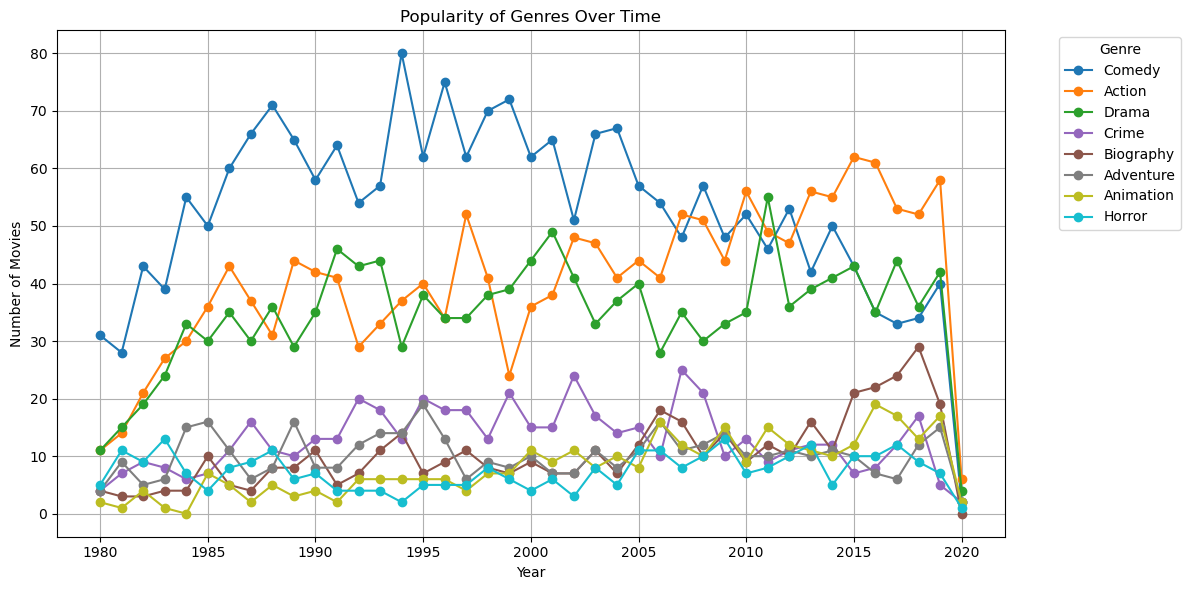

In [246]:
plt.figure(figsize= (12,6))
genre_counts[top_genres].plot(kind = 'line', marker = 'o', ax = plt.gca(), cmap = 'tab10')
plt.legend(title = 'Genre' , loc ='upper left', bbox_to_anchor = (1.05,1))
plt.title('Popularity of Genres Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

###### we find that comedy genre was the most popular over the years (has the highest number of movies)

##### Which genre has the highest average rating?

In [277]:
genre_score = movies.groupby('genre')['score'].mean().sort_values(ascending = False).reset_index()
genre_score

,genre,score
0,Musical,7.900000
1,Music,7.200000
2,Biography,7.042191
3,Animation,6.762236
4,Drama,6.695344
5,Crime,6.681157
6,Mystery,6.665000
7,Family,6.540000
8,Romance,6.500000
9,Sci-Fi,6.387500


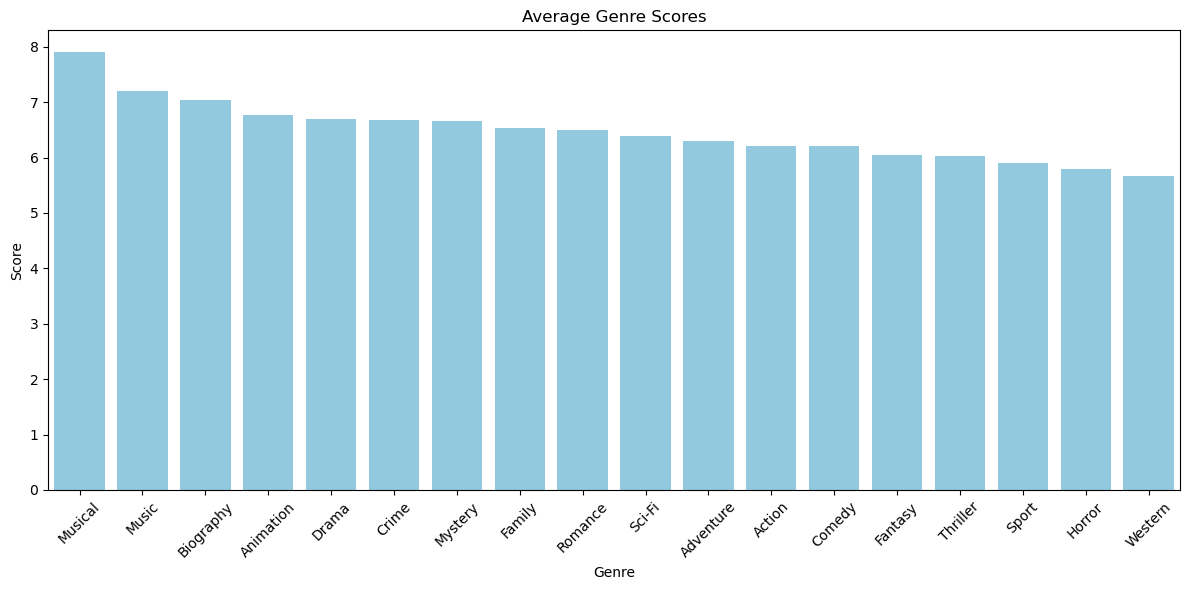

In [619]:
plt.figure(figsize = (12,6))
sns.barplot(data = genre_score, x = 'genre', y = 'score', color = 'skyblue')
plt.xlabel('Genre')
plt.ylabel('Score')
plt.xticks(rotation = 45)
plt.title('Average Genre Scores')
plt.tight_layout()
plt.show()

###### we find that Musical genre has the highest average rating 

##### What are the top genres in terms of gross revenue?

In [622]:
movies['genre'].value_counts()

genre
Comedy       2182
Action       1666
Drama        1439
Crime         536
Biography     429
Adventure     419
Animation     331
Horror        304
Fantasy        42
Mystery        20
Thriller       12
Family         10
Romance         8
Sci-Fi          8
Western         3
Music           1
Sport           1
Musical         1
Name: count, dtype: int64

In [623]:
genre_gross = movies.groupby('genre')['gross'].mean().sort_values(ascending = False).reset_index()[:10]
genre_gross

,genre,gross
0,Animation,2.413567e+08
1,Family,2.157876e+08
2,Action,1.458350e+08
3,Adventure,1.095587e+08
4,Mystery,1.011835e+08
5,Biography,4.831195e+07
6,Horror,4.783676e+07
7,Comedy,4.452676e+07
8,Crime,3.976627e+07
9,Fantasy,3.925157e+07


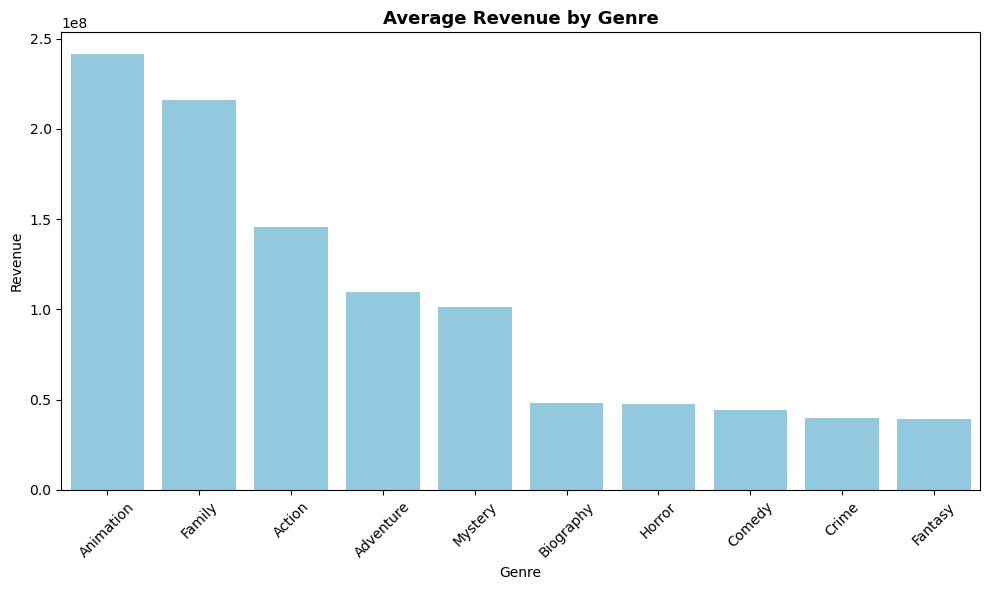

In [625]:
plt.figure(figsize = (10,6))
sns.barplot(data = genre_gross, x = 'genre', y = 'gross', color = 'skyblue')
plt.xlabel('Genre')
plt.ylabel('Revenue')
plt.title('Average Revenue by Genre',fontsize = 13, fontweight = "bold")
plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

###### Animation genre has the highest Average gross revenue

##### Who are the top directors in terms of average movie rating?

In [627]:
movies.groupby('director')['score'].mean().sort_values(ascending = False)[:10].index.to_list()

['Olivier Nakache',
 'Marco Tullio Giordana',
 'Anurag Kashyap',
 'Aamir Khan',
 'Nadine Labaki',
 'Sergio Leone',
 'Bob Persichetti',
 'Stanley Kubrick',
 'Nitesh Tiwari',
 'Lee Unkrich']

In [310]:
ratings_dir= movies.groupby('director')['score'].mean().sort_values(ascending = False)[:10].reset_index()
ratings_dir

,director,score
0,Olivier Nakache,8.50
1,Marco Tullio Giordana,8.50
2,Anurag Kashyap,8.50
3,Aamir Khan,8.40
4,Nadine Labaki,8.40
5,Sergio Leone,8.40
6,Bob Persichetti,8.40
7,Stanley Kubrick,8.35
8,Nitesh Tiwari,8.35
9,Lee Unkrich,8.30


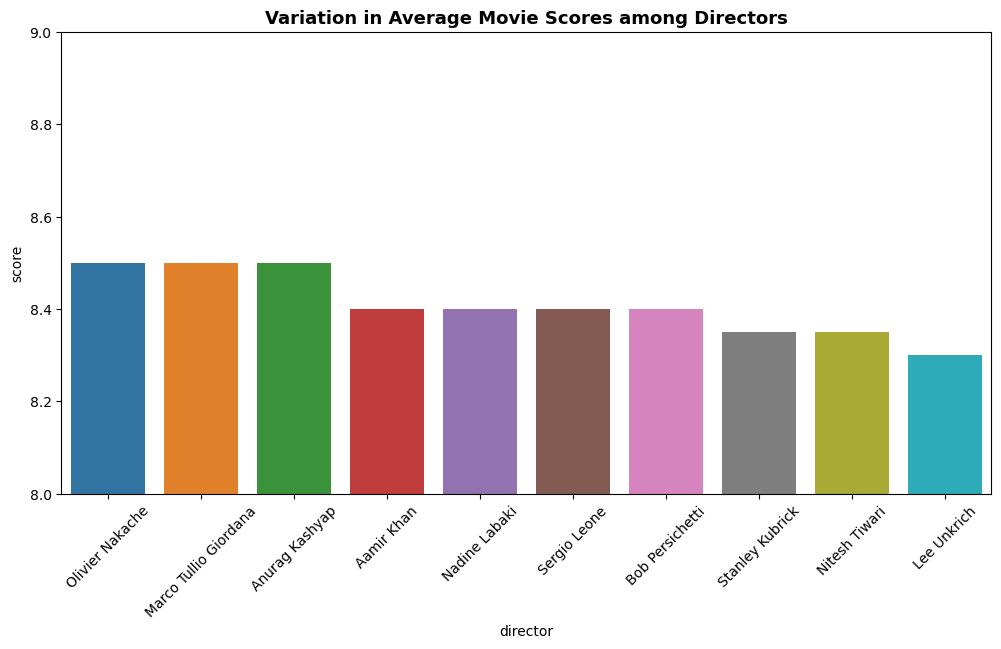

In [342]:
plt.figure(figsize = (12,6))
sns.barplot(data = ratings_dir, x = 'director', y= 'score')
plt.ylim(8,9)
plt.title( "Variation in Average Movie Scores among Directors", fontsize = 13, fontweight = "bold")
plt.xticks(rotation = 45)
plt.show()

###### Top 3 high rated directors are Olivier Nakache, Marco Tullio Giordana, Anurag Kashyap

##### Is there a correlation between the number of movies a director has made and their average movie rating?

In [344]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0,June
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0,July
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0,July


In [417]:
# movie_counts = movies.groupby('director').agg({'director': 'count', 'score': 'mean'})
# movie_counts = ['count_director', 'score' ]
# movie_counts(by = 'count_director', ascending = False)

,count_director,score
director,,
Woody Allen,38,6.973684
Clint Eastwood,31,6.967742
Steven Spielberg,27,7.440741
Directors,25,6.496000
Ron Howard,24,6.825000
...,...,...
Jeff Bleckner,1,6.200000
Jeff Baena,1,5.800000
Jefery Levy,1,5.800000


In [364]:
movie_counts = movies['director'].value_counts().reset_index()
movie_counts.columns = ['director', 'movie_count']
movie_counts.head()

,director,movie_count
0,Woody Allen,38
1,Clint Eastwood,31
2,Steven Spielberg,27
3,Directors,25
4,Ron Howard,24


In [365]:
avg_scores = movies.groupby('director')['score'].mean().reset_index()
avg_scores

,director,score
0,A.R. Murugadoss,7.300000
1,Aamir Khan,8.400000
2,Aaron Blaise,6.800000
3,Aaron Norris,4.983333
4,Aaron Seltzer,2.800000
...,...,...
2811,Zoya Akhtar,8.100000
2812,Édouard Molinaro,5.850000
2813,Élie Chouraqui,6.500000
2814,Éric Rohmer,7.485714


In [366]:
director_stats = movie_counts.merge(avg_scores, on = 'director')
director_stats.head()

,director,movie_count,score
0,Woody Allen,38,6.973684
1,Clint Eastwood,31,6.967742
2,Steven Spielberg,27,7.440741
3,Directors,25,6.496000
4,Ron Howard,24,6.825000


In [367]:
director_stats[['movie_count','score']].corr()

,movie_count,score
movie_count,1.000000,0.148139
score,0.148139,1.000000


<Axes: >

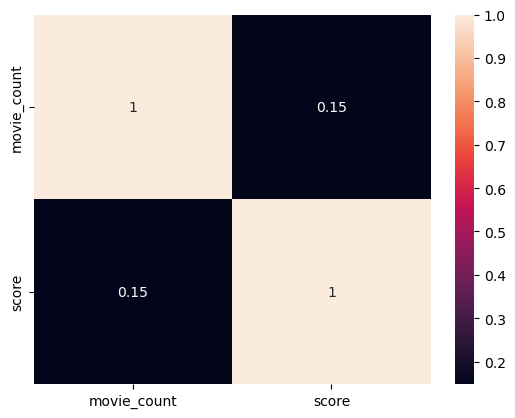

In [611]:
sns.heatmap(director_stats[['movie_count','score']].corr(), annot = True)

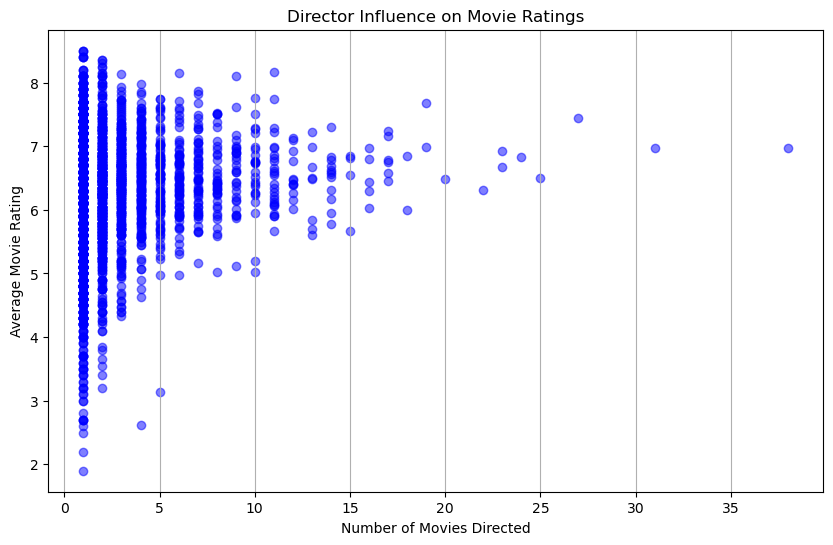

In [372]:
plt.figure(figsize=(10, 6))
plt.scatter(director_stats['movie_count'], director_stats['score'], color='blue', alpha=0.5)
plt.title('Director Influence on Movie Ratings')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Average Movie Rating')
plt.grid(axis='x')  # Show grid lines only on the x-axis
plt.show()

###### there is a weak positive correlation between the number of movies and its average rating

##### Are movies written by certain writers more likely to be successful?

In [379]:
writer_score= movies.groupby('writer')['score'].mean().sort_values(ascending = False)[:10].reset_index()

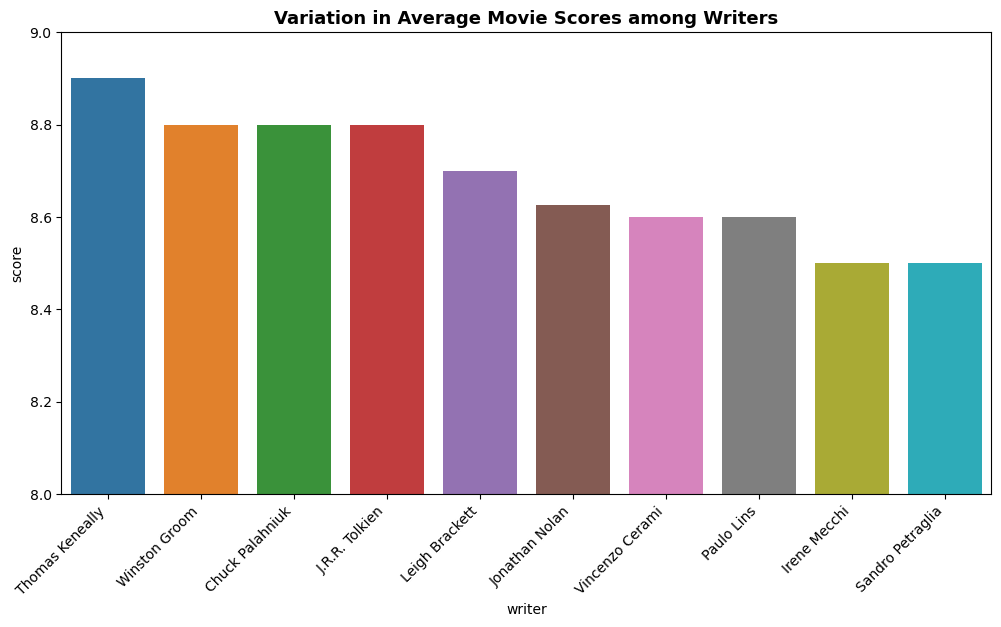

In [381]:
plt.figure(figsize = (12,6))
sns.barplot(data = writer_score, x = 'writer', y= 'score')
plt.ylim(8,9)
plt.title( "Variation in Average Movie Scores among Writers", fontsize = 13, fontweight = "bold")
plt.xticks(rotation = 45, ha = 'right')
plt.show()

###### Thomas keneally has the highest average score (who is a writer)

In [384]:
writer_gross = movies.groupby('writer')['gross'].mean().sort_values(ascending = False)[:10].reset_index()

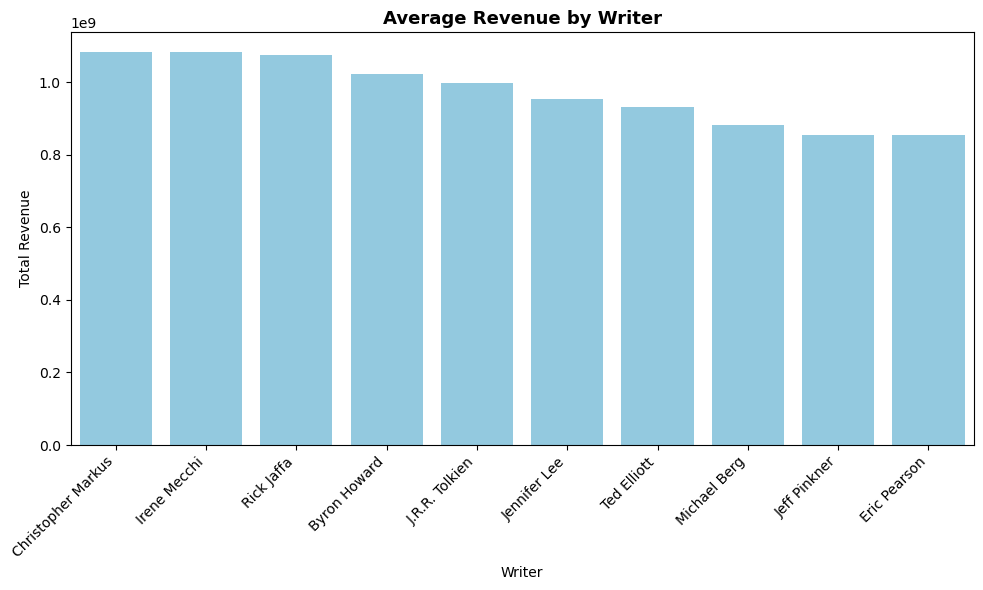

In [649]:
plt.figure(figsize = (10,6))
sns.barplot(data = writer_gross, x = 'writer', y = 'gross', color = 'skyblue')
plt.xlabel('Writer')
plt.ylabel('Total Revenue')
plt.title('Average Revenue by Writer',fontsize = 13, fontweight = "bold")
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

###### Christopher Markus generated the highest average gross (who is a writer)

In [612]:
writer_stats = movies.groupby('writer').agg({'score':'mean', 'gross':'mean'})
writer_stats= writer_stats.sort_values(by = 'gross', ascending = False)

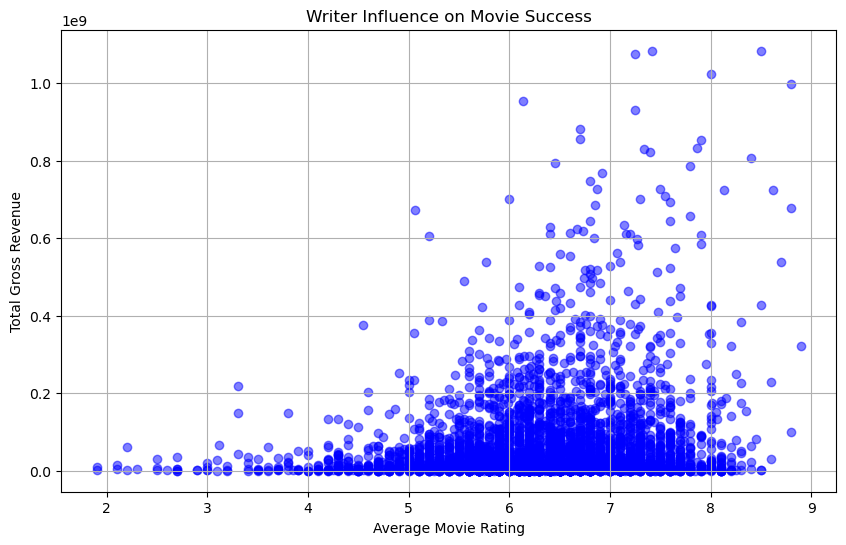

In [613]:
# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(writer_stats['score'], writer_stats['gross'], color='blue', alpha=0.5)
plt.title('Writer Influence on Movie Success')
plt.xlabel('Average Movie Rating')
plt.ylabel('Total Gross Revenue')
plt.grid(True)
plt.show()

In [614]:
writer_stats.head()

,score,gross
writer,,
Christopher Markus,7.414286,1.083883e+09
Irene Mecchi,8.500000,1.083721e+09
Rick Jaffa,7.250000,1.076159e+09
Byron Howard,8.000000,1.024121e+09
J.R.R. Tolkien,8.800000,9.970720e+08


Text(0.5, 1.0, 'by Writer')

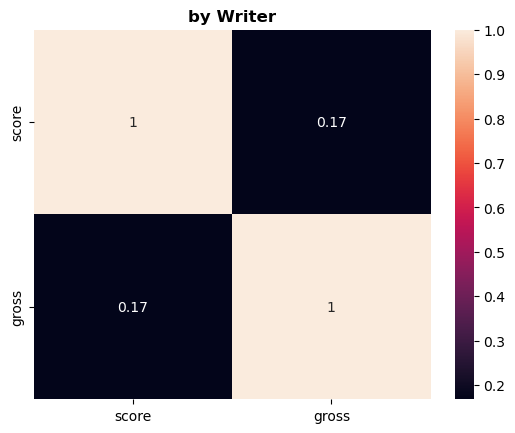

In [615]:
sns.heatmap(writer_stats[['score','gross']].corr(), annot = True)
plt.title('by Writer', fontweight= 'bold')

###### there is a weak positive correlation between the rating and the gross when grouped by Writer

##### Which star has appeared in the most movies

In [420]:
movies.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,July
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980.0,June
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980.0,July
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980.0,July


In [629]:
movies.duplicated().sum()

0

In [427]:
top_stars = movies['star'].value_counts().reset_index()[:10]

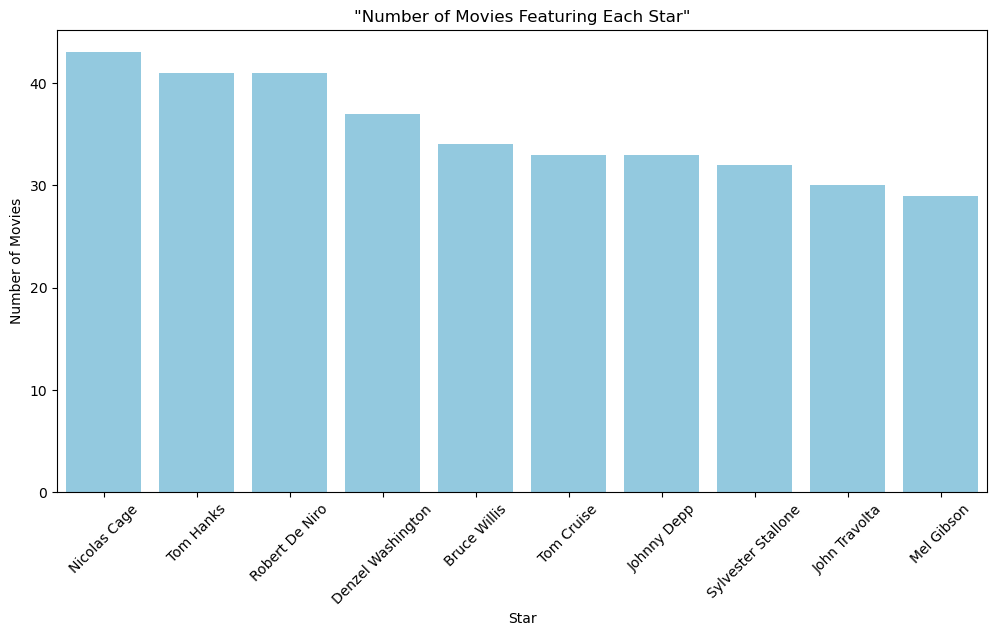

In [651]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_stars, x = 'star', y = 'count', color = 'skyblue')
plt.xticks(rotation = 45)
plt.title('"Number of Movies Featuring Each Star"')
plt.ylabel('Number of Movies')
plt.xlabel('Star')
plt.show()

###### Nicolas cage has the highest appearance 

##### Is there a correlation between the star's popularity and the movie's gross revenue?


In [451]:
star_stats = movies.groupby('star').agg({'star':'count', 'gross':'mean'})
star_stats.columns= ['num_movies', 'gross']
star_stats

,num_movies,gross
star,,
'Weird Al' Yankovic,1,6.157157e+06
50 Cent,1,4.656396e+07
A.J. Cook,1,9.094113e+07
Aaliyah,1,4.547911e+07
Aamir Khan,8,6.509909e+07
...,...,...
Zoe Margaret Colletti,1,1.045455e+08
Zoe Saldana,1,7.150844e+07
Zoey Deutch,4,3.762487e+07


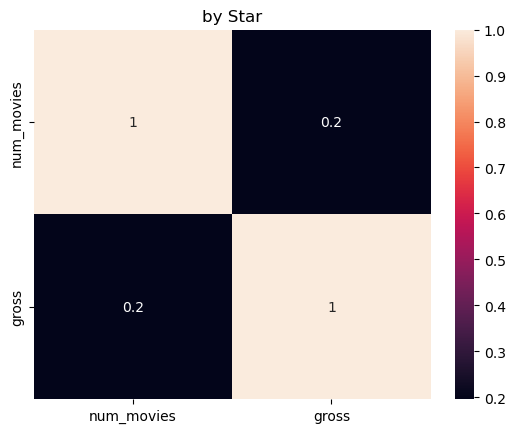

In [452]:
sns.heatmap(star_stats[['num_movies','gross']].corr(), annot = True)
plt.title('by Star')
plt.show()

##### Are there certain stars that consistently appear in high-rated movies?

In [ ]:
## assuming that it is considers a high rated movie if its score is  >= 8

In [483]:
star_scores = movies[['star','score']].sort_values(by = 'score', ascending = False)
star_scores

,star,score
2443,Tim Robbins,9.3
5243,Christian Bale,9.0
2444,John Travolta,8.9
4245,Elijah Wood,8.9
2247,Liam Neeson,8.9
...,...,...
4342,Jonathan Cherry,2.1
4412,Kelly Clarkson,2.1
5306,Carmen Electra,1.9
5354,Paris Hilton,1.9


In [488]:
shine_stars = star_scores[star_scores['score'] >= 8]
shine_stars_10= shine_stars['star'].value_counts()[:10].reset_index()

In [489]:
shine_stars_10

,star,count
0,Leonardo DiCaprio,7
1,Aamir Khan,6
2,Tom Hanks,5
3,Christian Bale,4
4,Robert De Niro,4
5,Harrison Ford,4
6,Matt Damon,3
7,Robert Downey Jr.,3
8,Kevin Spacey,3
9,Russell Crowe,3


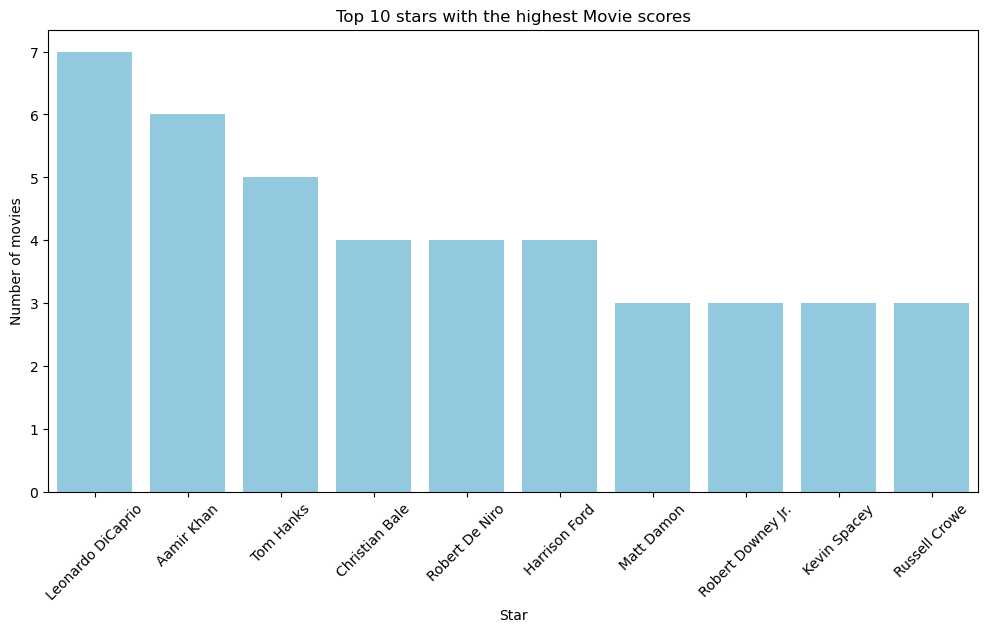

In [652]:
plt.figure(figsize = (12,6))
sns.barplot(data = shine_stars_10, x = 'star', y = 'count', color = 'skyblue')
plt.xticks(rotation = 45)
plt.title('Top 10 stars with the highest Movie scores')
plt.xlabel('Star')
plt.ylabel('Number of movies')
plt.show()

###### Leonardo Dicaprio appeared the most in top rated movies

##### Is there a correlation between a movie's budget and its gross revenue?

In [492]:
movies.isnull().sum()

name           0
rating         0
genre          0
released       0
score          0
votes          0
director       0
writer         0
star           0
country        0
budget      1991
gross          0
company        0
runtime        0
year          47
month          0
dtype: int64

In [497]:
movies_no_null = movies.copy()

In [499]:
movies_no_null = movies_no_null.dropna()

In [500]:
movies_no_null[['gross', 'budget']].corr()

,gross,budget
gross,1.000000,0.740028
budget,0.740028,1.000000


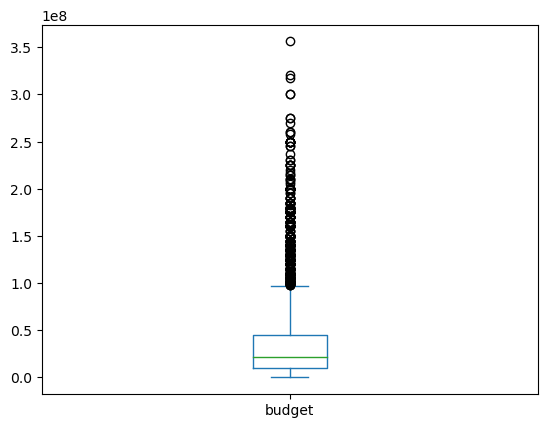

In [514]:
movies['budget'].plot(kind = 'box')
plt.show()

i will consider that the missing values are randomly distributed then there is no bias therefore 
i will fill them with the mode because of the outliers 

In [527]:
filled_movies = movies.copy()

In [528]:
filled_movies['budget']= filled_movies['budget'].fillna( filled_movies['budget'].mode()[0])

In [529]:
filled_movies[['gross', 'budget']].corr()

,gross,budget
gross,1.000000,0.746657
budget,0.746657,1.000000


<Axes: >

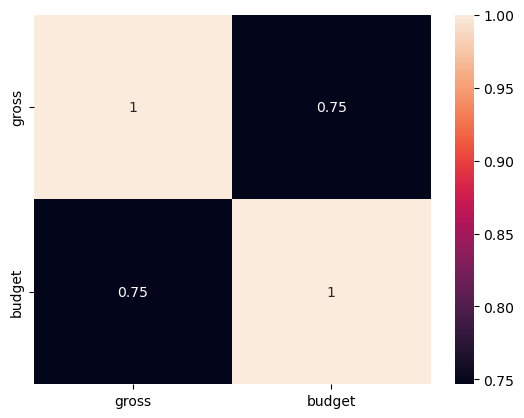

In [633]:
sns.heatmap(filled_movies[['gross', 'budget']].corr(), annot = True)

###### There is a very strong correlation between gross and budget 

##### How has the average movie budget changed over time?


In [ ]:
movies_with_fill

In [521]:
avg_yearly_budget = movies_with_fill.groupby('year')['budget'].mean().reset_index()

C:\Users\sasa_\AppData\Local\Temp\ipykernel_17640\2002757449.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.lineplot(data =avg_yearly_budget, x = 'year', y = 'budget', ci = False)


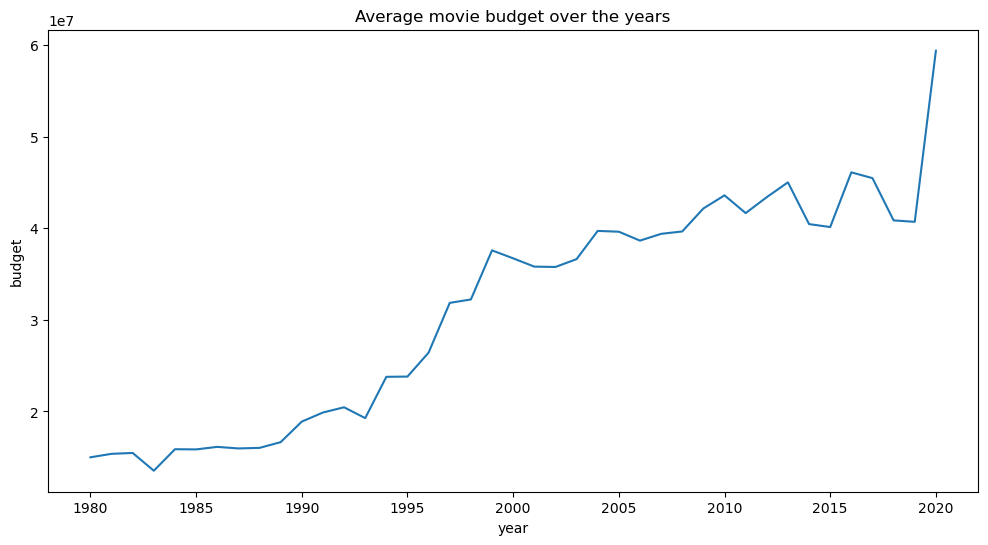

In [653]:
plt.figure(figsize = (12,6))
sns.lineplot(data =avg_yearly_budget, x = 'year', y = 'budget', ci = False)
plt.title('Average movie budget over the years')
plt.show()

###### Budget has peaked at 2020 

##### Are high-budget movies more likely to receive higher ratings?

In [530]:
movies_with_fill[['budget','score']].corr()

,budget,score
budget,1.000000,0.058862
score,0.058862,1.000000


<Axes: >

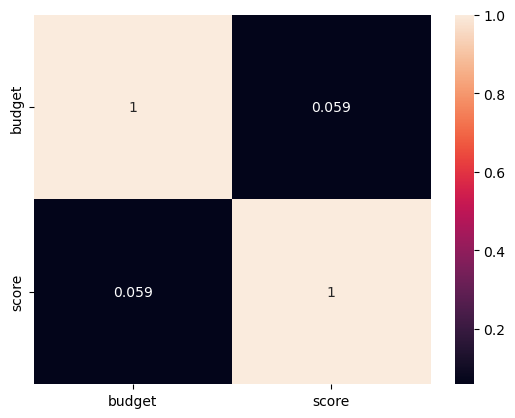

In [531]:
sns.heatmap(movies_with_fill[['budget','score']].corr(), annot = True)

###### There is a weak positive correlation between budget and score

##### Which country produces the most movies?


In [536]:
movies.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,July


In [541]:
country_movies = movies['country'].value_counts().reset_index()[:10]

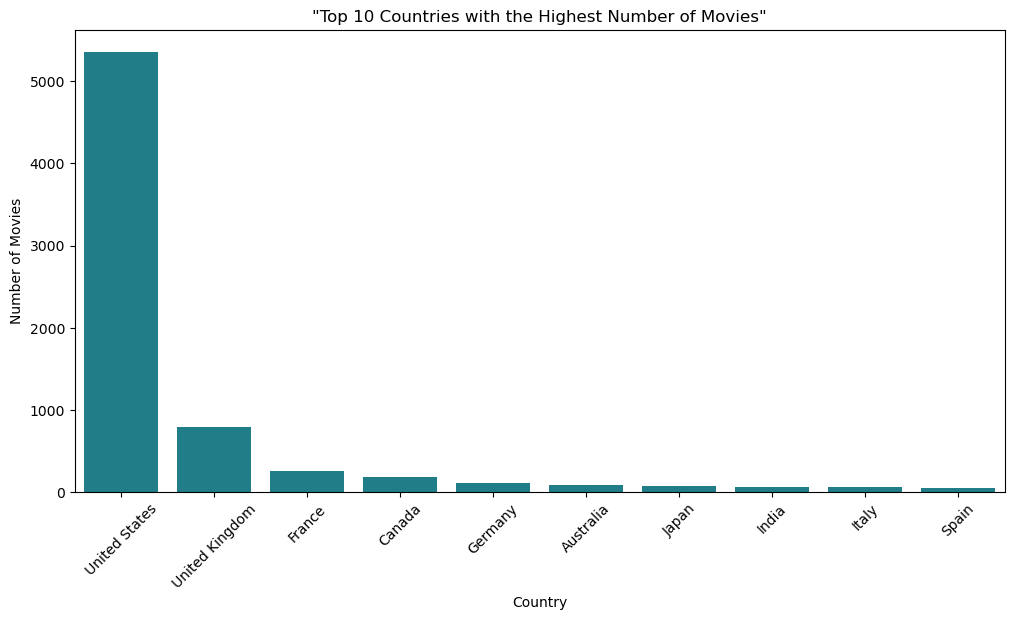

In [543]:
plt.figure(figsize = (12,6))
sns.barplot(data = country_movies, x = 'country', y = 'count', color = "#108A99")
plt.xticks(rotation = 45)
plt.title('"Top 10 Countries with the Highest Number of Movies"')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.show()

###### United States has the highest production of movies 

##### Is there a correlation between a movie's country of origin and its average rating?


In [549]:
country_stats= movies.groupby('country').agg(avg_score =('score','mean')\
                                           , country_count = ('country','count'))

In [550]:
country_stats[['avg_score','country_count']].corr()

,avg_score,country_count
avg_score,1.000000,-0.129464
country_count,-0.129464,1.000000


<Axes: >

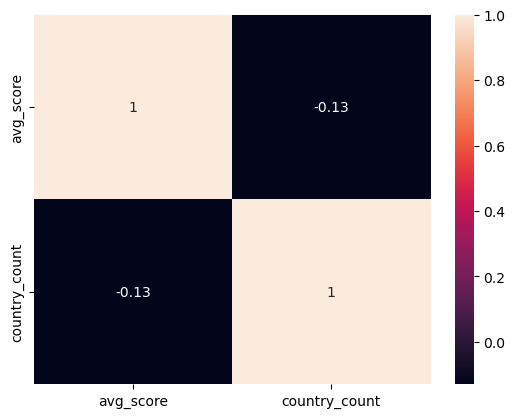

In [553]:
sns.heatmap(country_stats[['avg_score','country_count']].corr(), annot = True)

###### There is a weak negative correlation between the average score and the country origin

##### Are movies from certain countries more likely to be successful internationally?

In [554]:
movies.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,July


In [568]:
country_check = movies.groupby('country').agg({'score':'mean', 'gross':'mean'})
country_check

,score,gross
country,,
Argentina,7.816667,2.269010e+07
Aruba,4.900000,1.031992e+07
Australia,6.670588,3.538122e+07
Austria,7.020000,2.092008e+07
Belgium,7.137500,5.060999e+06
Brazil,7.700000,1.650788e+07
Canada,6.122652,3.355409e+07
Chile,6.600000,1.955851e+07
China,6.734286,2.177334e+08


In [569]:
country_check[['score','gross']].corr()

,score,gross
score,1.000000,-0.087881
gross,-0.087881,1.000000


<Axes: >

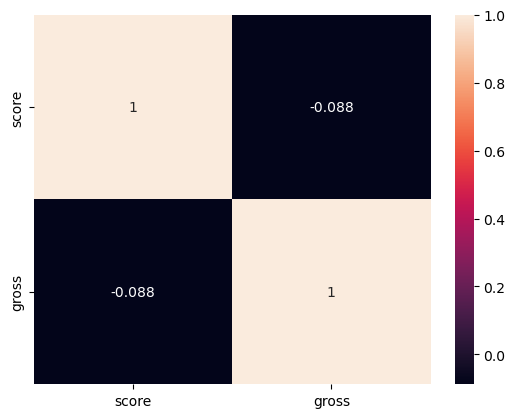

In [570]:
sns.heatmap(country_check[['score','gross']].corr(), annot = True)

###### there is a weak negative correlation between the score and gross when grouped by the country

##### Which production company has produced the most movies?


In [562]:
movies.head(2)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year,month
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980.0,June
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980.0,July


In [566]:
top_10_companies = movies['company'].value_counts()[:10].reset_index()
top_10_companies

,company,count
0,Universal Pictures,376
1,Warner Bros.,332
2,Columbia Pictures,332
3,Paramount Pictures,319
4,Twentieth Century Fox,240
5,New Line Cinema,173
6,Touchstone Pictures,132
7,Walt Disney Pictures,123
8,Metro-Goldwyn-Mayer (MGM),123
9,TriStar Pictures,94


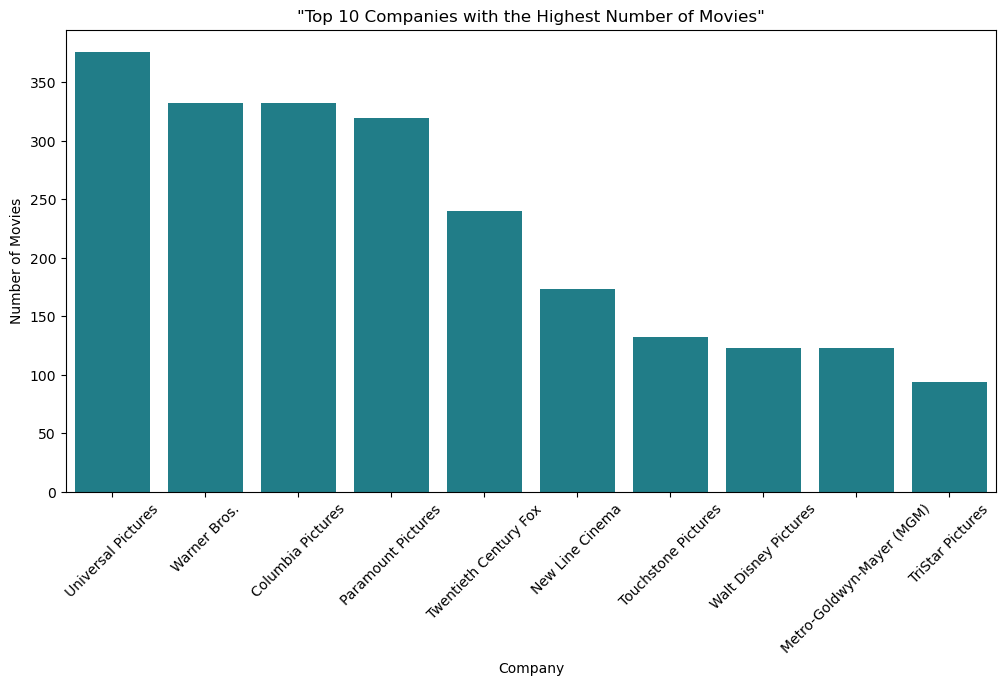

In [656]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_10_companies, x = 'company', y = 'count', color = "#108A99")
plt.xticks(rotation = 45)
plt.title('"Top 10 Companies with the Highest Number of Movies"')
plt.xlabel('Company')
plt.ylabel('Number of Movies')
plt.show()

###### Universal Pictures has The highest production of movies

##### Is there a correlation between the production company and the movie's average rating or gross revenue?


In [572]:
company_stats = movies.groupby('company').agg(avg_score = ('score','mean'), gross = ('gross', 'mean'),\
                              company_count= ('company','count'))
company_stats

,avg_score,gross,company_count
company,,,
"""DIA"" Productions GmbH & Co. KG",6.1,44350926.0,1
"""Weathering With You"" Film Partners",7.5,193457467.0,1
.406 Production,6.8,10580.0,1
1+2 Seisaku Iinkai,8.2,1196218.0,1
10 West Studios,6.4,814906.0,1
...,...,...,...
i am OTHER,7.2,17986781.0,1
i5 Films,6.6,10031529.0,1
iDeal Partners Film Fund,7.5,506303.0,1


In [573]:
company_stats[['gross','company_count','avg_score']].corr()

,gross,company_count,avg_score
gross,1.000000,0.095820,0.097298
company_count,0.095820,1.000000,-0.005849
avg_score,0.097298,-0.005849,1.000000


<Axes: >

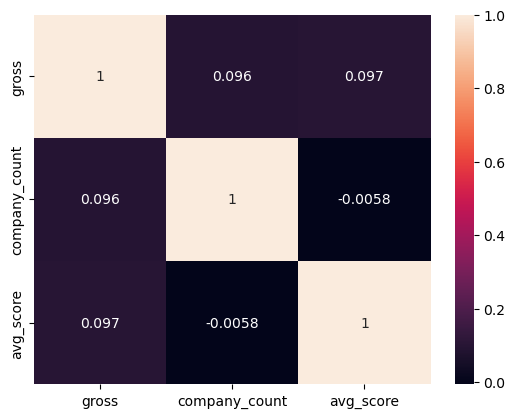

In [574]:
sns.heatmap(company_stats[['gross','company_count','avg_score']].corr(), annot = True)

##### Are there certain production companies known for producing high-quality or high-grossing films?

In [644]:
top_10_avg_gross_companies = movies.groupby('company')['gross'].mean().sort_values(ascending = False).\
                                                                                    reset_index()[:10] 

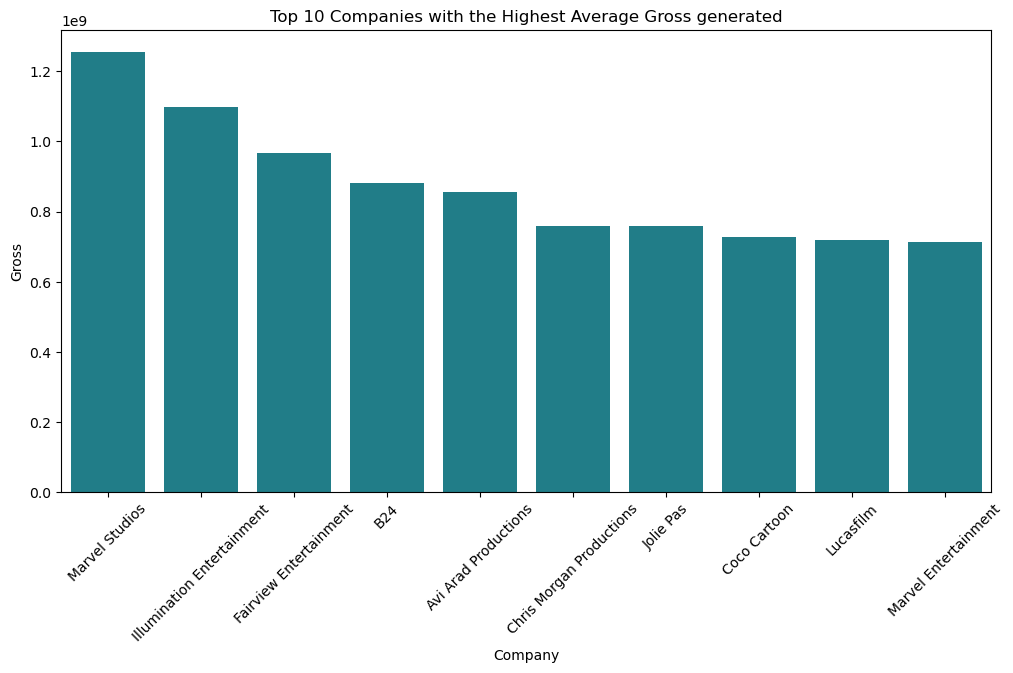

In [645]:
plt.figure(figsize = (12,6))
sns.barplot(data = top_10_avg_gross_companies, x = 'company', y = 'gross', color = "#108A99")
plt.xticks(rotation = 45)
plt.title('Top 10 Companies with the Highest Average Gross generated')
plt.xlabel('Company')
plt.ylabel('Gross')
plt.show()

In [643]:
check = movies['company'].value_counts().reset_index()
check[check['company'] == 'Marvel Studios']

,company,count
58,Marvel Studios,12


###### Marvel Studios  company has generated the highest average gross  

##### What is the distribution of movie runtimes?


In [588]:
num_bins = int(np.sqrt(len(movies)))

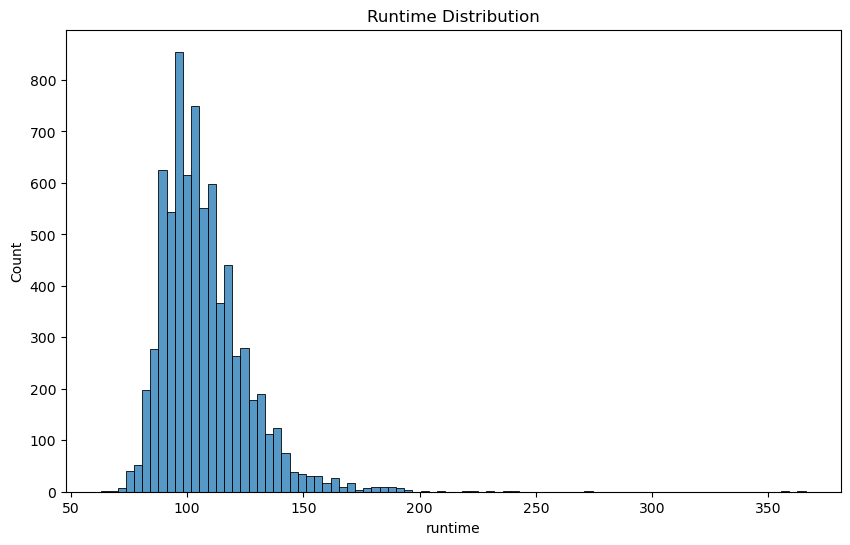

In [591]:
plt.figure(figsize= (10,6))
sns.histplot(data = movies, x = 'runtime', bins = num_bins)
plt.title('Runtime Distribution')
plt.show()

###### Runtime follows a normal distribution but its right skewed 

##### Is there a correlation between a movie's runtime and its  rating or gross revenue?


In [593]:
movies[['runtime','score','gross']].corr()

,runtime,score,gross
runtime,1.000000,0.397226,0.245117
score,0.397226,1.000000,0.188071
gross,0.245117,0.188071,1.000000


<Axes: >

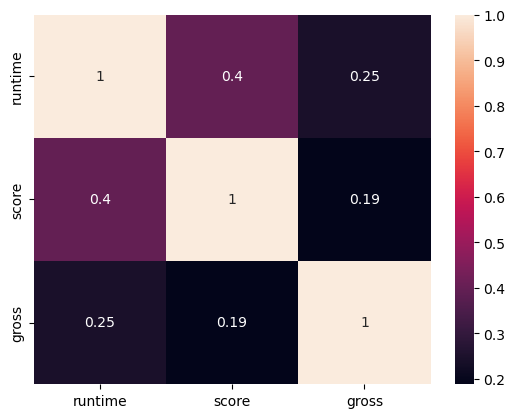

In [596]:
sns.heatmap(movies[['runtime','score','gross']].corr(), annot = True)

##### Are there certain genres that tend to have longer or shorter runtimes?

In [602]:
genre_stats = movies.groupby('genre')['runtime'].mean().sort_values(ascending = False).reset_index()

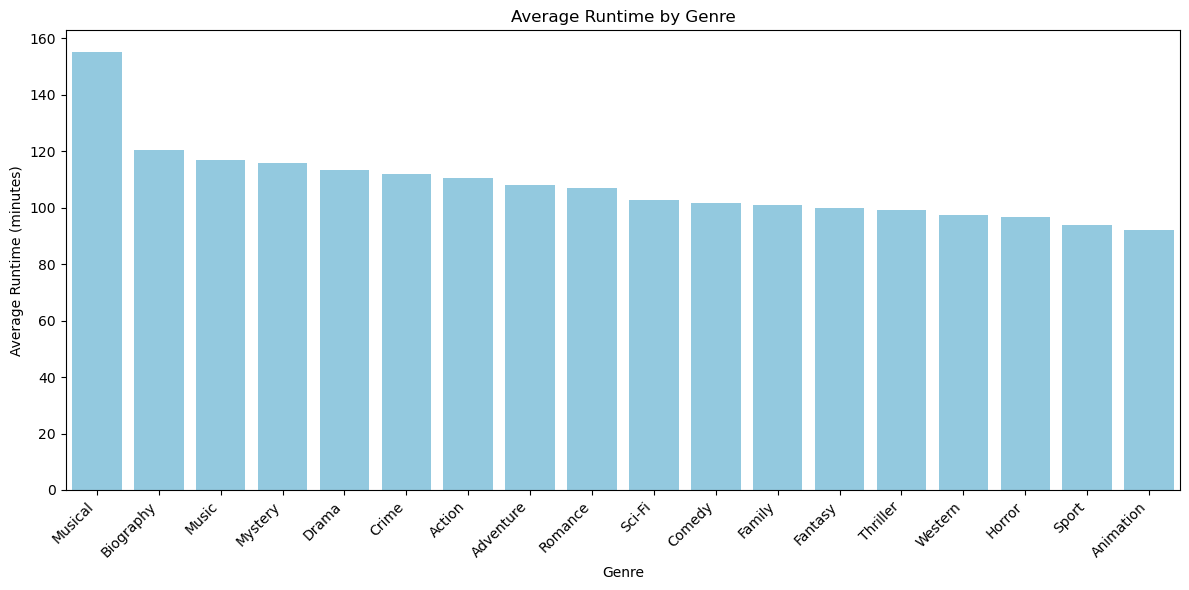

In [603]:
# Plotting box plot to visualize the runtime distribution for each genre
plt.figure(figsize=(12, 6))
sns.barplot(data = genre_stats, x = 'genre' , y = 'runtime', color = 'skyblue')
plt.title('Average Runtime by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (minutes)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

###### Musical genre has the highest average runtime

In [ ]:
correlation_overall

In [605]:
numerical_columns = movies.select_dtypes('number')

Text(0.5, 1.0, 'Overall Correlation')

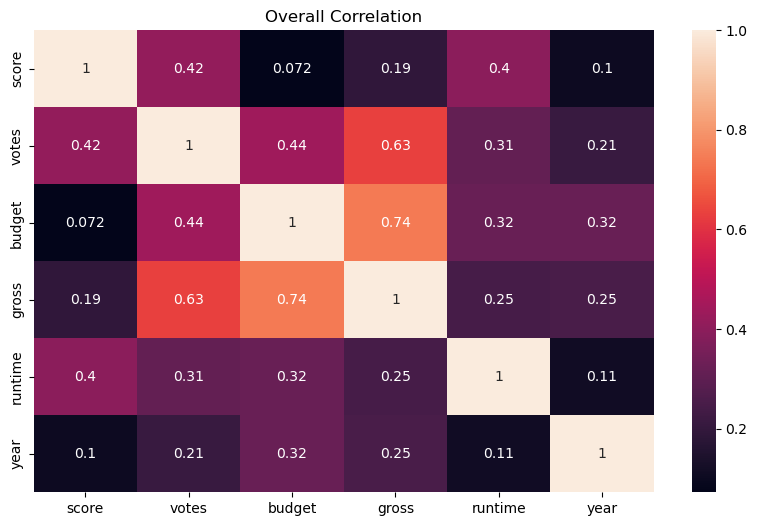

In [657]:
plt.figure(figsize = (10,6))
sns.heatmap(numerical_columns.corr(), annot = True)
plt.title('Overall Correlation')